In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [15]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

# model.add(Dense(3, activation='sigmoid', input_dim=11))
# model.add(Dense(1, activation='sigmoid'))

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


I0000 00:00:1730276605.333167      69 service.cc:145] XLA service 0x7f55c00014c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730276605.333220      69 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730276605.333225      69 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


109/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6123 - loss: 0.6570

I0000 00:00:1730276606.306339      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6718 - loss: 0.6133 - val_accuracy: 0.8012 - val_loss: 0.4664
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.4602 - val_accuracy: 0.8056 - val_loss: 0.4418
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4346 - val_accuracy: 0.8100 - val_loss: 0.4332
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.4258 - val_accuracy: 0.8131 - val_loss: 0.4274
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.4194 - val_accuracy: 0.8213 - val_loss: 0.4232
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8195 - loss: 0.4177 - val_accuracy: 0.8200 - val_loss: 0.4170
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8151 - loss: 0.4194 - val_accuracy: 0.8225 - val_loss: 0.4113
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4132 - val_accuracy: 0.8256

In [23]:
model.layers[0].get_weights()

[array([[ 2.6801527e-02,  5.8657560e-04, -8.3332479e-02, -4.8278219e-01,
          9.0256222e-02, -3.3048722e-01, -2.0970340e-01, -9.5590293e-02,
          6.2798876e-01,  2.1200048e-02, -5.1356051e-02],
        [-6.8173975e-01,  3.5640371e-01,  5.8159769e-01, -2.6696333e-01,
          4.5565957e-01, -2.1884466e-02,  1.0531499e+00,  1.2708571e+00,
         -4.2826545e-01,  2.8268358e-01, -2.6260074e-02],
        [ 1.5409678e-05, -1.0132601e-01,  6.2592953e-01, -9.1238417e-02,
          2.7141979e-02, -7.9598114e-02,  3.4528948e-02, -1.2620082e-01,
         -5.8624864e-01,  1.2666957e-01,  2.5109377e-02],
        [-3.4153166e-01, -2.6091215e-01, -6.8272948e-01,  4.4495770e-01,
          2.0698445e-01,  2.9434696e-01,  1.4481710e-01, -6.5305971e-02,
         -1.2868895e-01, -1.8898718e-01, -1.3904534e-01],
        [ 2.0214021e-01, -9.8993564e-01, -4.4173023e-01,  7.3167437e-01,
          8.9826924e-01, -2.1038066e-01,  3.5599279e-01, -3.2898262e-01,
         -6.5373346e-02,  7.7988349e-0

In [24]:
model.layers[1].get_weights()

[array([[ 0.5959515 , -0.06315481, -0.4589338 ,  0.5199067 ,  0.09447113,
         -0.34944138, -0.27360383, -0.0050925 ,  0.19534782,  0.40665507,
          0.56340694],
        [-0.37567276, -0.17818205, -0.07996964, -0.44062954,  0.82609415,
         -0.125526  , -0.06758227, -0.7535973 , -0.4286022 , -0.14556544,
          0.09063741],
        [ 0.11867761, -0.0612092 , -0.6110762 , -0.6425251 ,  0.16694403,
         -0.52638143,  0.21598446,  0.43193465, -0.03964932, -0.12132555,
         -0.97200507],
        [-0.08721606,  0.4347005 , -0.32651633, -0.8144289 ,  0.42902806,
          0.01014304, -0.26355043,  0.0727476 , -0.7088899 ,  0.33996457,
          0.47613215],
        [-0.4261815 , -0.08015956,  0.771867  , -0.14534014,  0.48854735,
         -0.258028  ,  0.1319099 , -0.40753242, -0.33840677, -0.2923214 ,
          0.52966744],
        [-0.21618244,  0.525048  ,  0.24627237, -0.26777884,  0.11961903,
          0.11890079,  0.6220026 ,  0.10045911, -0.34304568,  0.4279471

In [25]:
model.layers[2].get_weights()

[array([[-0.3570432 ],
        [-0.24057421],
        [ 1.0391654 ],
        [-1.1117178 ],
        [ 0.9859083 ],
        [-1.024161  ],
        [-0.18600507],
        [-0.95068115],
        [-1.1482172 ],
        [-0.7777202 ],
        [ 1.1659646 ]], dtype=float32),
 array([-0.07361916], dtype=float32)]

In [26]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [27]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
y_pred = np.where(y_log>0.5,1,0)

In [29]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8575

In [31]:
history.history

{'accuracy': [0.758593738079071,
  0.7987499833106995,
  0.8010937571525574,
  0.8064062595367432,
  0.8104687333106995,
  0.8142187595367432,
  0.8196874856948853,
  0.8224999904632568,
  0.8309375047683716,
  0.8395312428474426,
  0.8451562523841858,
  0.8481249809265137,
  0.8506249785423279,
  0.8528125286102295,
  0.8535937666893005,
  0.8568750023841858,
  0.8567187786102295,
  0.8571875095367432,
  0.8579687476158142,
  0.8590624928474426,
  0.8595312237739563,
  0.8581249713897705,
  0.8592187762260437,
  0.8598437309265137,
  0.8603125214576721,
  0.8610937595367432,
  0.8607812523841858,
  0.8618749976158142,
  0.8606250286102295,
  0.8603125214576721,
  0.8614062666893005,
  0.8607812523841858,
  0.8621875047683716,
  0.8615624904632568,
  0.8629687428474426,
  0.8623437285423279,
  0.8635937571525574,
  0.8618749976158142,
  0.8615624904632568,
  0.8631250262260437,
  0.8642187714576721,
  0.8651562333106995,
  0.8651562333106995,
  0.864062488079071,
  0.8651562333106995,


In [32]:
import matplotlib.pyplot as plt

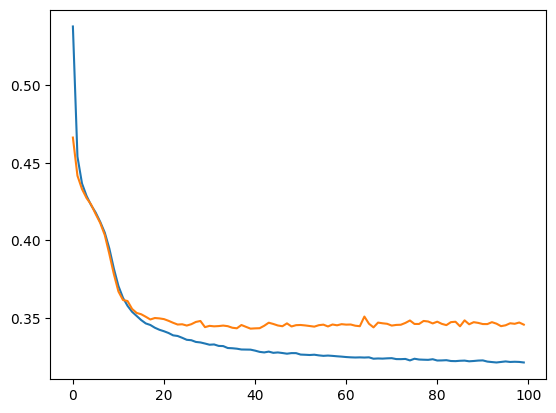

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

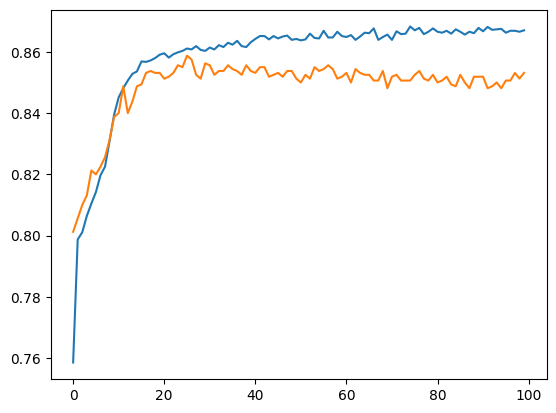

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])